## Importing Libraries ##

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from tensorflow.keras.layers import Conv2D, MaxPooling2D

## Setting the Directories for the Dataset ##
https://github.com/RishitToteja/Chext-X-ray-Images-Data-Set

In [ ]:
main_dir= "Dataset"
train_dir= os.path.join(main_dir, "train")
test_dir= os.path.join(main_dir, "test")
train_covid_dir= os.path.join(train_dir, "COVID19")
train_normal_dir= os.path.join(train_dir, "NORMAL")
test_covid_dir= os.path.join(test_dir, "COVID19")
test_normal_dir= os.path.join(test_dir, "NORMAL")

## Showing a Sample of the Images ##

In [10]:
train_covid_names = os.listdir(train_covid_dir) # Names of all covid train images
train_normal_names = os.listdir(train_normal_dir) # Names of all normal train images
test_covid_names = os.listdir(test_covid_dir) # Names of all covid test images
test_normal_names = os.listdir(test_normal_dir) # Names of all normal test images

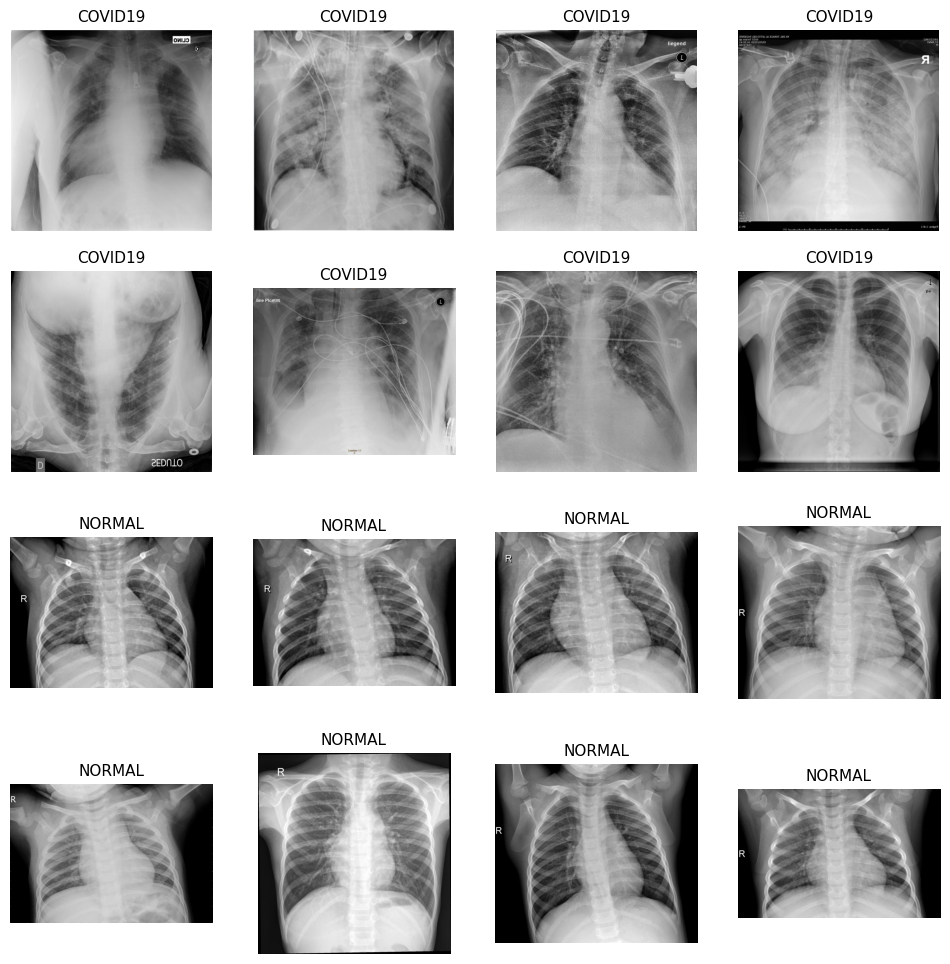

In [11]:
rows= 4
columns= 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_img= [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img= [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

merged_img= covid_img + normal_img
titles = ["COVID19"]*8 + ["NORMAL"]*8

for i, img_path in enumerate(merged_img):
  title = titles[i]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")
  
plt.show()

## Data Augmentation ##

In [12]:
# Data Augmentation (Configuration)
dgen_train= ImageDataGenerator(rescale= 1./255, validation_split= 0.2, zoom_range= 0.2, horizontal_flip= True) # Training Data
dgen_validation= ImageDataGenerator(rescale= 1./255,) # Validation Data
dgen_test= ImageDataGenerator(rescale= 1./255,) # Testing Data

# Creating the Data Generators
train_generator= dgen_train.flow_from_directory(train_dir, target_size = (150, 150), subset = 'training', batch_size = 32, class_mode= 'binary') # Training Data
validation_generator= dgen_train.flow_from_directory(train_dir, target_size = (150, 150), subset= "validation", batch_size= 32, class_mode = "binary") # Validation Data
test_generator= dgen_test.flow_from_directory(test_dir, target_size = (150, 150), batch_size = 32, class_mode= "binary") # Testing Data

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
print("Class labels: ", train_generator.class_indices)
print("Image shape: ", train_generator.image_shape)

Class labels:  {'COVID19': 0, 'NORMAL': 1}
Image shape:  (150, 150, 3)


## Building the CNN Model ##

In [ ]:
# Creating the CNN Model
model = Sequential() # Initializing the CNN

model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape)) # Convolutional Layer 1
# 32 Filters of 5x5 size, padding = "same" means that the output image will be of the same size as the input image, relu activation function. 
# Extracts features from the input images.

model.add(MaxPooling2D(pool_size=(2,2))) # Pooling Layer 1
# 2x2 Pooling layer, reduces the feature map dimensions by half, helps in reducing the number of parameters and computation in the network, helps in avoiding overfitting.
# Extracts the most important features.

model.add(Dropout(0.5)) # Dropout Layer 1
# Regularization technique to prevent overfitting, randomly drops(=0) 50% of the input units in the layer.

model.add(Conv2D(64, (5,5), padding = "same", activation = "relu")) # Convolutional Layer 2
# 64 Filters of 5x5 size, padding = "same" means that the output image will be of the same size as the input image, relu activation function.
# Extracts features from the input images.

model.add(MaxPooling2D(pool_size=(2,2)))  # Pooling Layer 2
# 2x2 Pooling layer, reduces the feature map dimensions by half, helps in reducing the number of parameters and computation in the network, helps in avoiding overfitting.
# Extracts the most important features.

model.add(Dropout(0.5)) # Dropout Layer 2
# Regularization technique to prevent overfitting, randomly drops(=0) 50% of the input units in the layer.

model.add(Flatten()) # Flatten Layer
# Flattens the 2D input from the previous layer into a 1D vector, prepares the data for input into the Dense layer.

model.add(Dense(256, activation = 'relu')) # Dense Layer 1
# Fully connected layer, 256 neurons, relu activation function.

model.add(Dropout(0.5)) # Dropout Layer 3
# Regularization technique to prevent overfitting, randomly drops(=0) 50% of the input units in the layer.

model.add(Dense(1, activation = 'sigmoid')) # Dense Layer 2
# Fully connected layer, 1 neuron, sigmoid activation function.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

## Compiling and Training the Model ##

In [15]:
# Compiling the Model
model.compile(Adam(learning_rate= 0.001), loss= 'binary_crossentropy', metrics= ['accuracy'])
# Adam Optimizer, learning rate (Step size) = 0.001, loss function = binary crossentropy.

In [9]:
# Training the Model
history= model.fit(train_generator, epochs= 27, validation_data= validation_generator)

Epoch 1/27


46/46 [==============================] - 60s 1s/step - loss: 0.8014 - accuracy: 0.7516 - val_loss: 0.3358 - val_accuracy: 0.9006
Epoch 2/27
46/46 [==============================] - 50s 1s/step - loss: 0.2712 - accuracy: 0.9020 - val_loss: 0.1769 - val_accuracy: 0.9558
Epoch 3/27
46/46 [==============================] - 44s 963ms/step - loss: 0.2024 - accuracy: 0.9234 - val_loss: 0.1990 - val_accuracy: 0.9530
Epoch 4/27
46/46 [==============================] - 43s 935ms/step - loss: 0.1815 - accuracy: 0.9358 - val_loss: 0.1926 - val_accuracy: 0.9530
Epoch 5/27
46/46 [==============================] - 43s 940ms/step - loss: 0.1519 - accuracy: 0.9476 - val_loss: 0.1202 - val_accuracy: 0.9641
Epoch 6/27
46/46 [==============================] - 44s 944ms/step - loss: 0.1262 - accuracy: 0.9593 - val_loss: 0.1375 - val_accuracy: 0.9503
Epoch 7/27
46/46 [==============================] - 44s 945ms/step - loss: 0.1568 - accuracy: 0.9496 - val_loss: 0.1256 - val_accuracy: 0.9641
Epo

Text(0.5, 0, 'epoch')

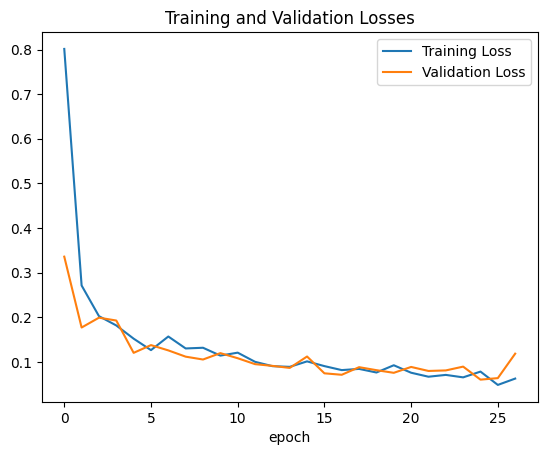

In [28]:
plt.plot(history.history['loss']) # Training Loss
plt.plot(history.history['val_loss']) # Validation Loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.title("Training and Validation Loss")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

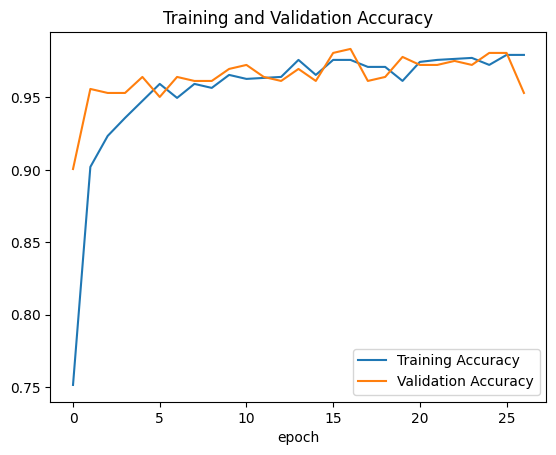

In [29]:
plt.plot(history.history['accuracy']) # Training Accuracy
plt.plot(history.history['val_accuracy']) # Validation Accuracy

plt.legend(['Training Accuracy', 'Validation Accuracy']) 
plt.title("Training and Validation Accuracy")
plt.xlabel('epoch')

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

16/16 [==============================] - 11s 722ms/step - loss: 0.0670 - accuracy: 0.9752
Test Set Loss :  0.06703081727027893
Test Set Accuracy :  0.9752066135406494


In [14]:
model.save("model.h5")

c:\Users\Jamil\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Quick Test ##

In [16]:
### Testing our Model ###
from keras.preprocessing import image
import keras.utils as image
from keras.models import load_model

# Loading the Model
model = load_model("model.h5")

folder_path = "Dataset/test/COVID19"
image_path = f"{folder_path}/COVID-19 (809).jpg"
img = image.load_img(image_path, target_size = (150,150))
images = image.img_to_array(img)
images = np.expand_dims(images, axis = 0)
prediction = model.predict(images)

if prediction == 0:
    print("The report is COVID-19 Positive")
else:
    print("The report is COVID-19 Negative")
    


1/1 [==============================] - 0s 150ms/step
The report is COVID-19 Positive
